# Exploratory Data Analysis - SEER Breast Cancer Data

## 1. Data Exploration

### Importing Libraries and Dataset

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df_seerdata = pd.read_csv("SEER Breast Cancer Dataset .csv")

### Quick Data Exploration

In [3]:
# Check the shape of the dataset
df_seerdata.shape

(4024, 16)

There are 4024 rows and 16 columns


In [4]:
# Check first-5 records
df_seerdata.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [5]:
# Check last-5 records
df_seerdata.tail()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


There are 5-numerical numerical variables and 11-categorical variables. The attribute 'status' can be used as target variable to predict whether a patient is alive or dead.

In [6]:
df_seerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

With the above outcome, we can say that categorical variables are :
Race, Marital Status, T Stage, N Stage, 6th Stage, Grade, A Stage, Estrogen Status, Progesterone Status, and status.
Numerical variables are:
Age, Tumor Size, Regional Node Examined, Reginol Node Positive, and Survival Months are numerical features.

Unnamed: 3 column is missing all the values, basically its an empty column and can be removed.

In [7]:
# checking the NaN values in df_seerdata
df_seerdata.isna().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

- There are no NaN values in any column. 
- Unnamed column is an empty column, and it can be removed

In [8]:
df_seerdata.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [9]:
!pip install data-quality-tests

In [10]:
# Importing the necessary Libraries
# data quality
from data_quality_tests import DataQuality as dq

In [11]:
# checking the data quality with the dq library
dq.data_quality_check(df_seerdata)

[=================================================================]


TEST CASE NULL VALUES: Failed

TEST CASE DUPLICATE VALUES: Failed

TEST CASE DTYPE MATCHING: Passed

TEST CASE OUTLIERS: Failed

TEST CASE COLUMN HEADER WHITESPACES: Failed

------------------------------------------------------------
[=================================================================]


In [12]:
# droping a 'Unnamed: 3' column, because iy doesnot consists of any data
df_seerdata.drop(['Unnamed: 3'], axis=1, inplace=True)

Column 'Unnamed: 3' has deleted

In [13]:
# Checking the duplicates
duplicate= df_seerdata[df_seerdata.duplicated()]
duplicate

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1010,63,White,Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,17,Positive,Positive,9,1,56,Alive


In [14]:
# delete duplicate values if any
df_seerdata = df_seerdata.drop_duplicates()

In [15]:
# Remove white spaces in column names if any
df_seerdata.columns = df_seerdata.columns.str.replace(' ', '')

In [16]:
# Let's do the data quality check now
dq.data_quality_check(df_seerdata)

[=================================================================]


TEST CASE NULL VALUES: Passed

TEST CASE DUPLICATE VALUES: Passed

TEST CASE DTYPE MATCHING: Passed

TEST CASE OUTLIERS: Failed

TEST CASE COLUMN HEADER WHITESPACES: Passed

------------------------------------------------------------
[=================================================================]


In [17]:
df_seerdata.shape

(4023, 15)

In [18]:
# Get column names
df_seerdata.columns

Index(['Age', 'Race', 'MaritalStatus', 'TStage', 'NStage', '6thStage', 'Grade',
       'AStage', 'TumorSize', 'EstrogenStatus', 'ProgesteroneStatus',
       'RegionalNodeExamined', 'ReginolNodePositive', 'SurvivalMonths',
       'Status'],
      dtype='object')

In [19]:
df_seerdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4023.0,53.969923,8.963118,30.0,47.0,54.0,61.0,69.0
TumorSize,4023.0,30.477007,21.121253,1.0,16.0,25.0,38.0,140.0
RegionalNodeExamined,4023.0,14.358439,8.100241,1.0,9.0,14.0,19.0,61.0
ReginolNodePositive,4023.0,4.158837,5.109724,1.0,1.0,2.0,5.0,46.0
SurvivalMonths,4023.0,71.301765,22.923009,1.0,56.0,73.0,90.0,107.0


- For the attributes age and survival months mean is less than median. The data is skewed to the left. The distribution is negatively skewed. 
- For the attributes tumor size, regional node examined, and regional node positive, Mean is greater than the Median. The data is skewed to the right. The distribution is positively skewed.

### Univariate Analysis

Univariate : Univariate analysis focusses on examining a single variable at a time.

#### 1. Target variable : Status

In [20]:
df_seerdata.Status.unique()

array(['Alive', 'Dead'], dtype=object)

The target variable has two values and it is a binary classification problem.

In [21]:
 # As the target variable is a categorical variable, we will look at its frequency table, percentage distribution and bar plot.
df_seerdata.Status.value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

- There are more alive patients than dead patients (imbalanced dataset).
- 3408 patients are alive, while 616 patients are dead.

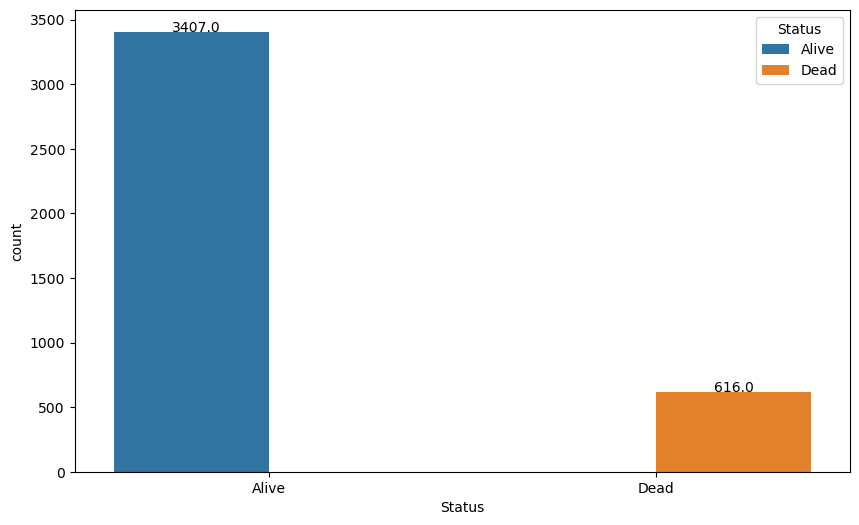

In [22]:
#sns.countplot(x=df_seerdata["Status"])
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="Status", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

Very minimal percentage of patients are dead (15%) and majority of the patients are alive (85%). 
Can be considered as imbalanced dataset

#### 2. Independent Attributes

##### 1) Numerical Attribute: Age

In [23]:
df_seerdata['Age'].describe()

count    4023.000000
mean       53.969923
std         8.963118
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64

- The youngest patient is 30 and the oldest patient is 69 years old.
- 25% of the patients are below 47 years old and 75 % of the patients are above 47 years old (25% percentile). 
- 50% of the patients are below 54 years old and 50% of the patients are above 54 years old (median). 
- 75 % of the patients are below 61 and 25 % of the patients are above 61 years old (75% percentile).

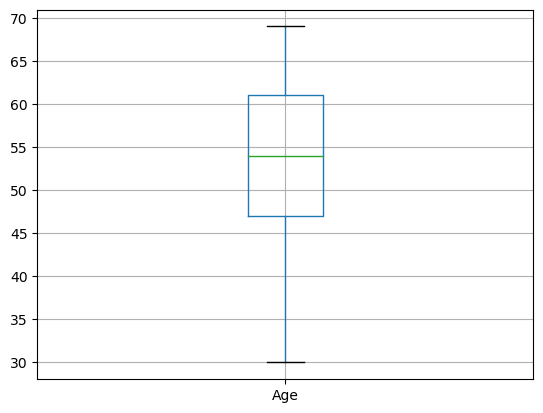

In [24]:
df_seerdata.boxplot(column='Age')
plt.show()

- There are no outliers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

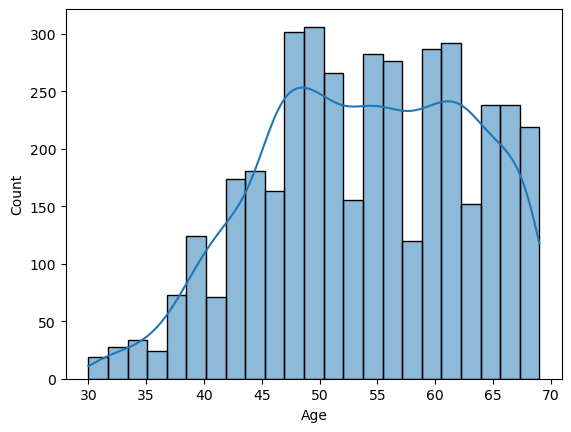

In [25]:
sns.histplot(df_seerdata, x="Age", kde=True)

The distribution is negatively skewed (skewed to the left).

##### 2. Numerical Attribute: Tumor Size

In [26]:
df_seerdata['TumorSize'].describe()


count    4023.000000
mean       30.477007
std        21.121253
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: TumorSize, dtype: float64

- The smallest tumor is 1 cm and the largest tumor is 140 cm.
- 25% of tumors are less than 16 cm and 75% are larger than 16 cm (25 percentile). 
- On average, 50% of tumors are below 25 cm and 50% are beyond 25 cm. 
- 75% of tumors are over 38 cm and 25% percent of tumours are below 38 cm.

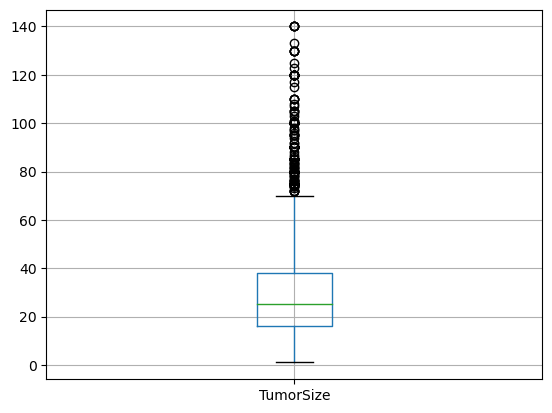

In [27]:
df_seerdata.boxplot(column='TumorSize')
plt.show()

Tumor size has lot of outliers.

<AxesSubplot:xlabel='TumorSize', ylabel='Count'>

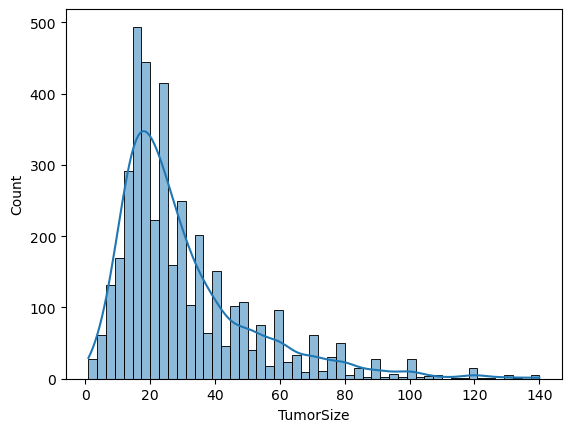

In [28]:
sns.histplot(df_seerdata, x="TumorSize", kde=True)

Tumor size distribution is skewed to the right.

##### 3. Numerical Attribute: Regional Node Examined

In [29]:
df_seerdata['RegionalNodeExamined'].describe()

count    4023.000000
mean       14.358439
std         8.100241
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        61.000000
Name: RegionalNodeExamined, dtype: float64

- The smallest regional node examined is 1 whereas the largest is 61.
- 25% of regional node examined is less than 9 (25 percentile).
- On average, 50% of regional node examined are below 14 and 50% are beyond 14.
- 75% regional node examined are below 19 whereas 25% are above 19.


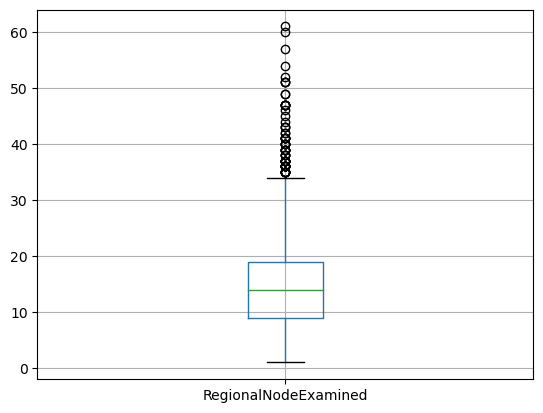

In [30]:
df_seerdata.boxplot(column='RegionalNodeExamined')
plt.show()

Regional Node Examined attribute has outliers

<AxesSubplot:xlabel='RegionalNodeExamined', ylabel='Count'>

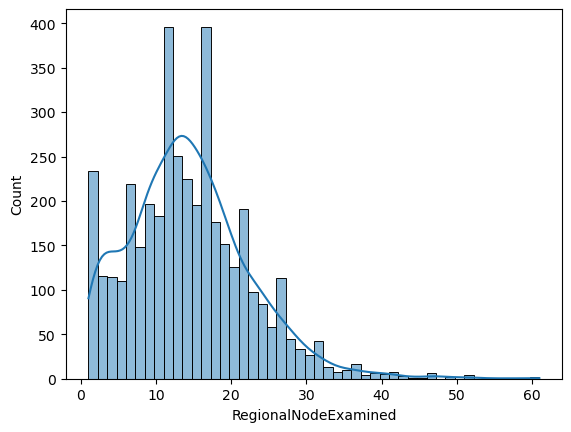

In [31]:
sns.histplot(df_seerdata, x="RegionalNodeExamined", kde=True)

 'Regional Node Examined' is skewed to the right.

##### 4. Numerical Attribute: Reginol Node Positive

In [32]:
df_seerdata['ReginolNodePositive'].describe()

count    4023.000000
mean        4.158837
std         5.109724
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        46.000000
Name: ReginolNodePositive, dtype: float64

- The smallest regional node positive is 1 whereas the largest is 46.
- 25% of regional node positive is 1 (25 percentile).
- On average, 50% of regional node positive are below 2 and 50% are beyond 2.
- 75% regional node positive are below 5 whereas 25% are above 5.

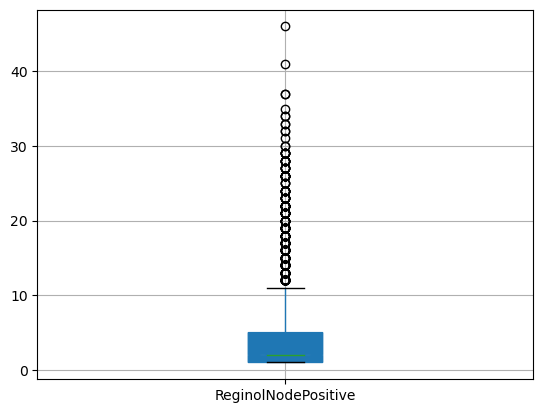

In [33]:
df_seerdata.boxplot(column='ReginolNodePositive',notch='True',patch_artist=True)
plt.show()

Attribute 'Reginol Node Positive' has outliers

<AxesSubplot:xlabel='ReginolNodePositive', ylabel='Count'>

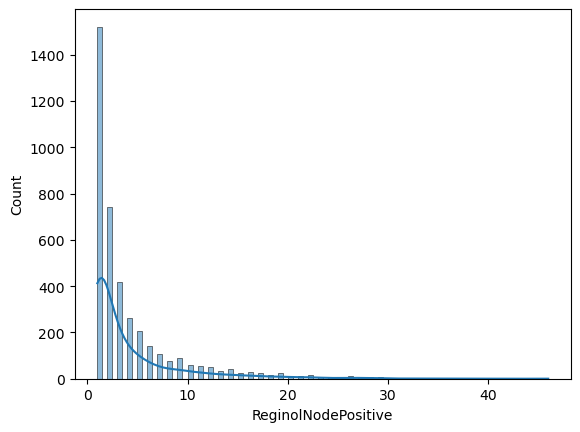

In [34]:
sns.histplot(df_seerdata, x="ReginolNodePositive", kde=True)

Attribute 'Regional Node Positive' is skewed to the right.

##### 5. Numerical Attribute: Survival Months

In [35]:
df_seerdata['SurvivalMonths'].describe()

count    4023.000000
mean       71.301765
std        22.923009
min         1.000000
25%        56.000000
50%        73.000000
75%        90.000000
max       107.000000
Name: SurvivalMonths, dtype: float64

The dataset has below information
- The smallest survival month is 1 and largest suvival months is 107
- 25% of patients survival months are below 56 months in the data.
- 50% of petients survival months are <=73
- 75% of patients survival months ara <=90

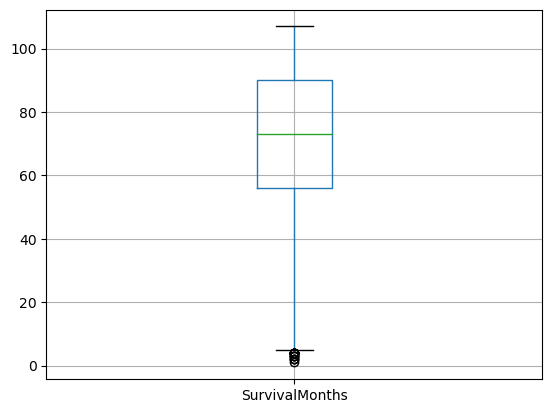

In [36]:
df_seerdata.boxplot(column='SurvivalMonths')
plt.show()

Survival Months has very minimal outliers.

<AxesSubplot:xlabel='SurvivalMonths', ylabel='Count'>

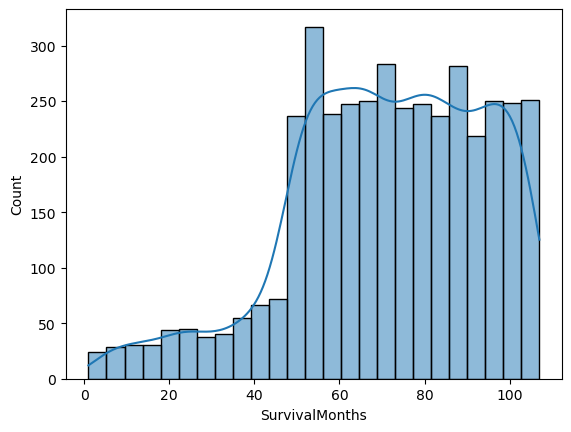

In [37]:
sns.histplot(df_seerdata, x="SurvivalMonths", kde=True)

Attribute 'SurvivalMonths'  is skewed to the left.

- Overall, Tumor size, Reginal Node Examined and Regional Node Positive have outliers. 
- Survival Months has very minimal outliers, it can be ignored to bias here. Also, how many months a patient can survive depends on the patient condition, treatment methodology, and many medical features. 

##### 6. Categorical Attribute: Race

In [38]:
df_seerdata['Race'].describe()

count      4023
unique        3
top       White
freq       3412
Name: Race, dtype: object

In [39]:
df_seerdata['Race'].value_counts()

White                                                        3412
Other (American Indian/AK Native, Asian/Pacific Islander)     320
Black                                                         291
Name: Race, dtype: int64

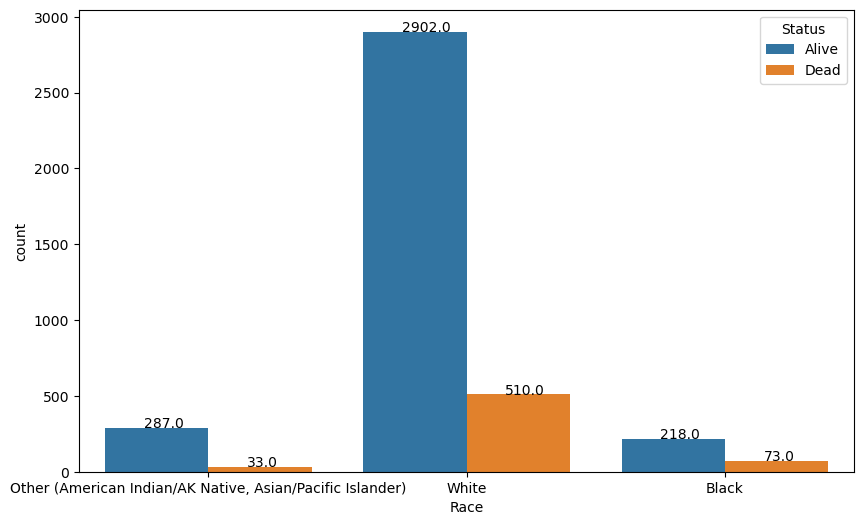

In [40]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="Race", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

Majority of the patients are of white race and the other two (Black and other) are very minimal

##### 7. Categorical Attribute: Marital Status

In [41]:
df_seerdata['MaritalStatus'].describe()

count                               4023
unique                                 5
top       Married (including common law)
freq                                2642
Name: MaritalStatus, dtype: object

- 4024 observations for Marital Status
- 5 unique elements for Marital Status
- Mode/ most frequency value is Married with frequence of 2643 patients.

In [42]:
df_seerdata['MaritalStatus'].value_counts()

Married (including common law)    2642
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: MaritalStatus, dtype: int64

- Majority of the patients are married. 
- Less percentage of patients are single , divorced, widowed.
- Only a small minority of the patients are separated.


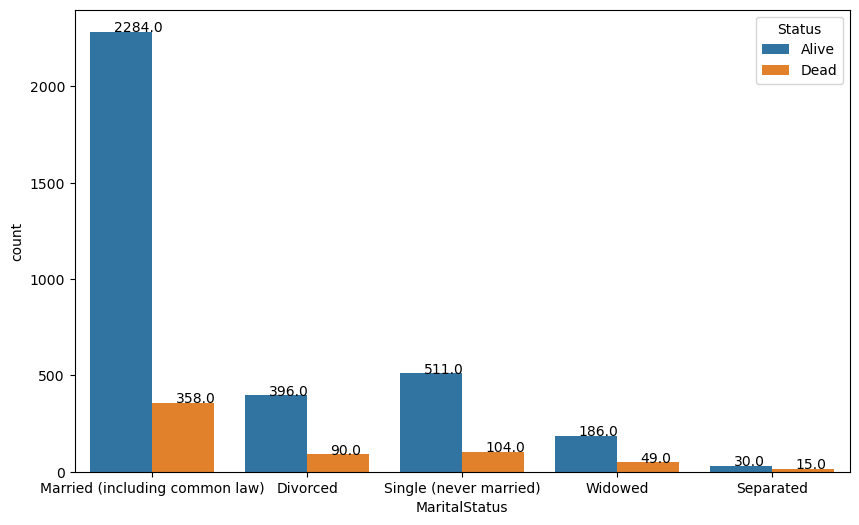

In [43]:
plt.figure(figsize=(10,6))

ax=sns.countplot(data=df_seerdata, x="MaritalStatus", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

##### 8. Categorical Attribute: T Stage

T Stage is Tumor size and extent of primary tumor

In [44]:
df_seerdata['TStage'].describe()

count     4023
unique       4
top         T2
freq      1786
Name: TStage, dtype: object

- Mode/ most frequent value is T2 with frequence of 1786 patients.

In [45]:
df_seerdata['TStage'].value_counts()

T2    1786
T1    1602
T3     533
T4     102
Name: TStage, dtype: int64

- Majority of the patients are belongs to T2 stage followed by T1 stage
- There are very less patients who belongs to T3 stage (533) 
- Minority of the patients are belogs to T4 stage

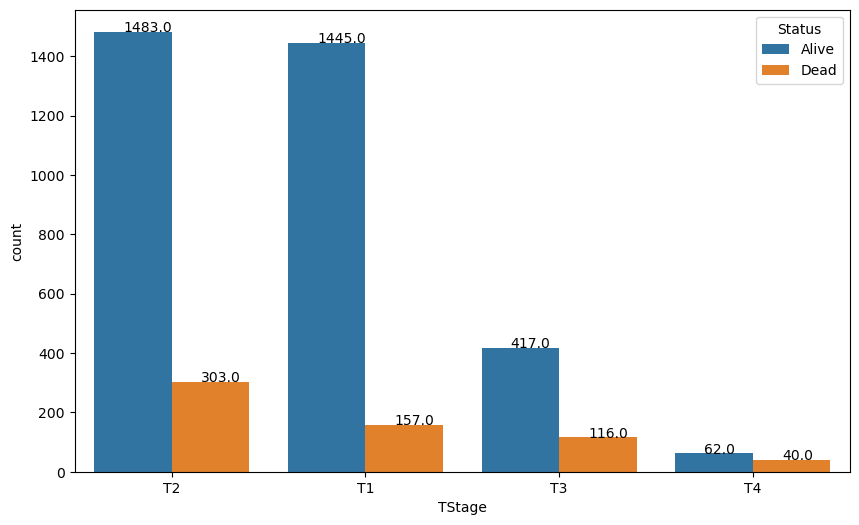

In [46]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="TStage", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

##### 9. Categorical Attribute: N Stage

In [47]:
df_seerdata['NStage'].describe()

count     4023
unique       3
top         N1
freq      2731
Name: NStage, dtype: object

- N Stage- Regional lymph node involvement
- Mode/ most frequent value is N1 with frequence of 2732 patients.

In [48]:
df_seerdata['NStage'].value_counts()

N1    2731
N2     820
N3     472
Name: NStage, dtype: int64

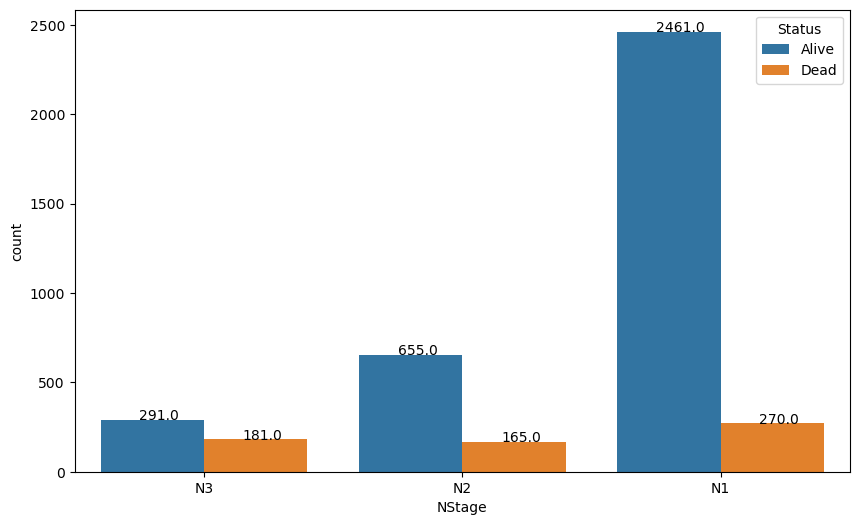

In [49]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="NStage", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

##### 10. Categorical Attribute: 6th Stage

6th Stage- 6th Edition by AJCC (American Joint Committee on Cancer). The staging system for cancer created by the AJCC (American Joint Committee on Cancer) is referred to as the 6th edition AJCC Stage, to categorise the amount and spread of cancer throughout a patient's body, the AJCC staging system is often used in cancer diagnosis and therapy. According to the features of the tumour, nodal involvement, and metastasis, the 6th edition of the AJCC staging system provided precise criteria and definitions for each stage. It included recommendations for grading breast cancer.

In [50]:
df_seerdata['6thStage'].describe()

count     4023
unique       5
top        IIA
freq      1304
Name: 6thStage, dtype: object

Mode/ M
ost frequent value is N1 with frequence of 2732 patients.

In [51]:
df_seerdata['6thStage'].value_counts()

IIA     1304
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6thStage, dtype: int64

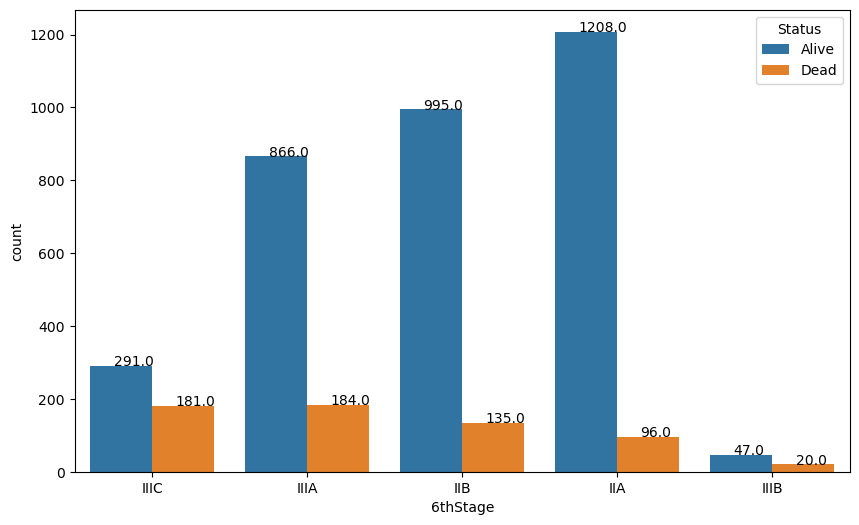

In [52]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="6thStage", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

Probability of death cases are more in IIIB and IIIC compare to other types of 6thStage. 

##### 11. Categorical Attribute: Grade

In [53]:
df_seerdata['Grade'].describe()

count                                    4023
unique                                      4
top       Moderately differentiated; Grade II
freq                                     2350
Name: Grade, dtype: object

In [54]:
df_seerdata['Grade'].value_counts()

Moderately differentiated; Grade II       2350
Poorly differentiated; Grade III          1111
Well differentiated; Grade I               543
Undifferentiated; anaplastic; Grade IV      19
Name: Grade, dtype: int64

- Tumor Grades are divided into four grades. Grade I , Grade II , Grade III and Grade IV.
- Highest number of patients tumor grades are moderately differentiated, Grade II
- Then, Poorly differentiated, Grade III. 
- Very less number of patients tumor grades are well differentiated, Grade I 
- Only small minority number of patients tumor grades are undifferentiated, Grade IV

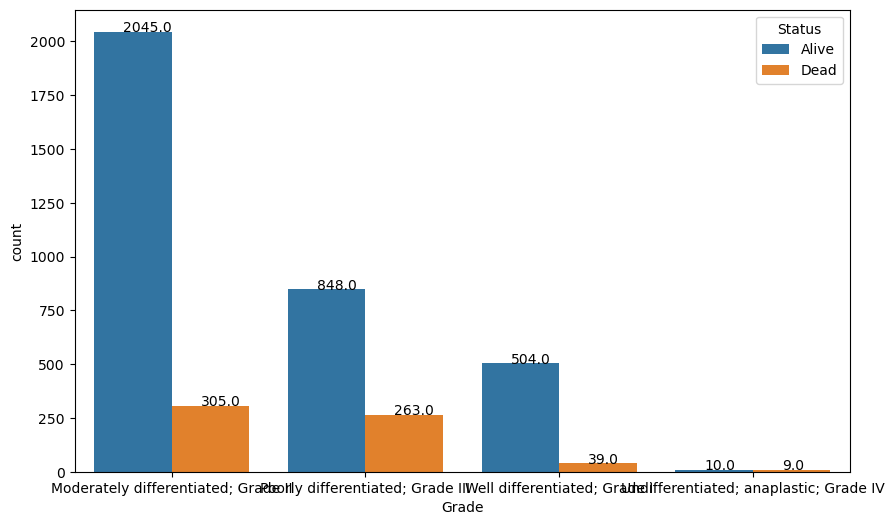

In [55]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="Grade", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

Based on the above observation, Grade-IV is most dangerous, patient won't be alive in this case

##### 12. Categorical Attribute: A Stage

In [56]:
df_seerdata['AStage'].describe()

count         4023
unique           2
top       Regional
freq          3931
Name: AStage, dtype: object

In [57]:
df_seerdata['AStage'].value_counts()

Regional    3931
Distant       92
Name: AStage, dtype: int64

A Stage has Regional and Distant types.
- Regional observations are 3932
- Distant observations are 92

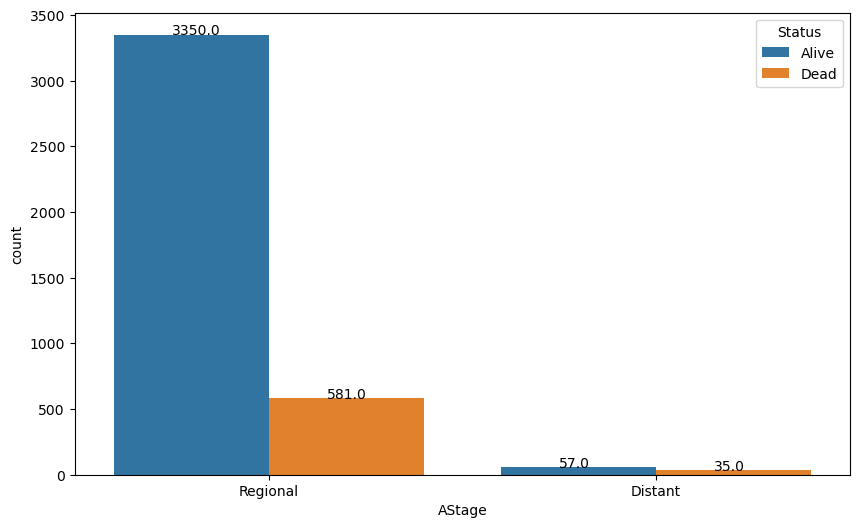

In [58]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="AStage", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

Distant is having more dead cases compare to regional.

##### 13. Categorical Attribute: Estrogen Status

In [59]:
df_seerdata['EstrogenStatus'].describe()

count         4023
unique           2
top       Positive
freq          3754
Name: EstrogenStatus, dtype: object

In [60]:
df_seerdata['EstrogenStatus'].value_counts()

Positive    3754
Negative     269
Name: EstrogenStatus, dtype: int64

- Majority of the patients estrogen receptor status is positve.
- Minimal number of patients estrogen receptor status is negative.

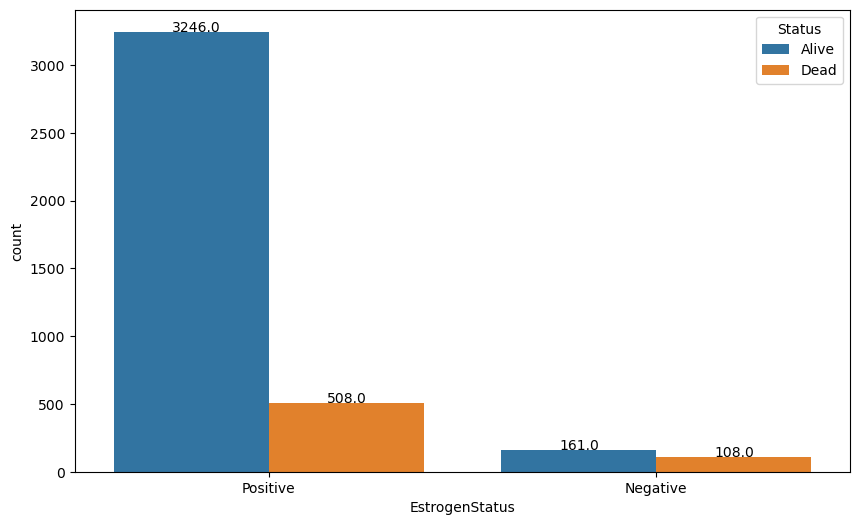

In [61]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="EstrogenStatus", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

Most of the alive patients have positive estrogen status whereas very less number of patients are having negative estrogen status. Similarly, majority of the dead patients are having negative estrogen status and less number of patients are having postive estrogen status. Hence, EstrogenStatus 'Negative' leads to 'death' of the patient in most of the cases 

In [62]:
##### 14. Categorical Attribute: Progesterone Status

In [63]:
df_seerdata['ProgesteroneStatus'].describe()

count         4023
unique           2
top       Positive
freq          3325
Name: ProgesteroneStatus, dtype: object

In [64]:
df_seerdata['ProgesteroneStatus'].value_counts()

Positive    3325
Negative     698
Name: ProgesteroneStatus, dtype: int64

- Majority of the patients progesterone receptor status is positve.
- Minimal number of patients progesterone receptor status is negative.

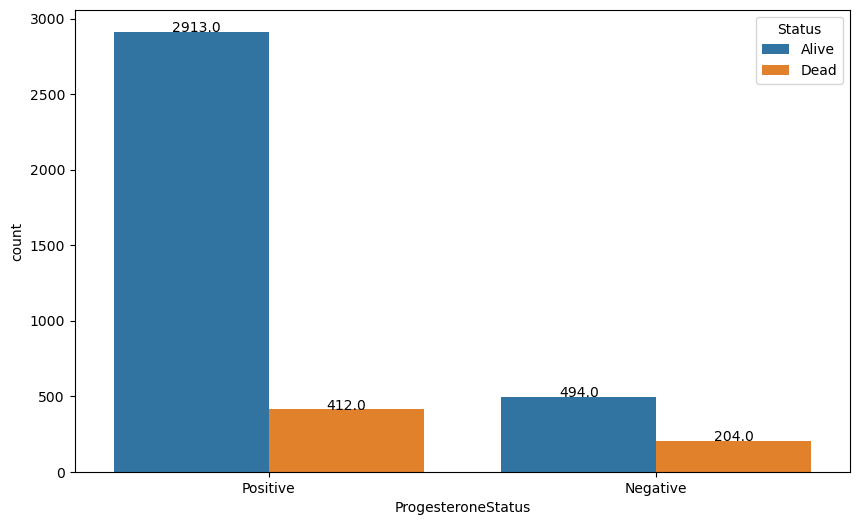

In [65]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_seerdata, x="ProgesteroneStatus", hue="Status")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

probability of dead cases are more when ProgesteroneStatus is 'Negative' 

With the above observations, the probability of dead cases are higher in below scenarios :
===================
T Stage : T3 and T4

N Stage: N2 and N3

6th Stage: IIIB and IIIC

Grade : Grade IV

A Stage : Distinct

Estrogen : Negative

Progesteron : Negative

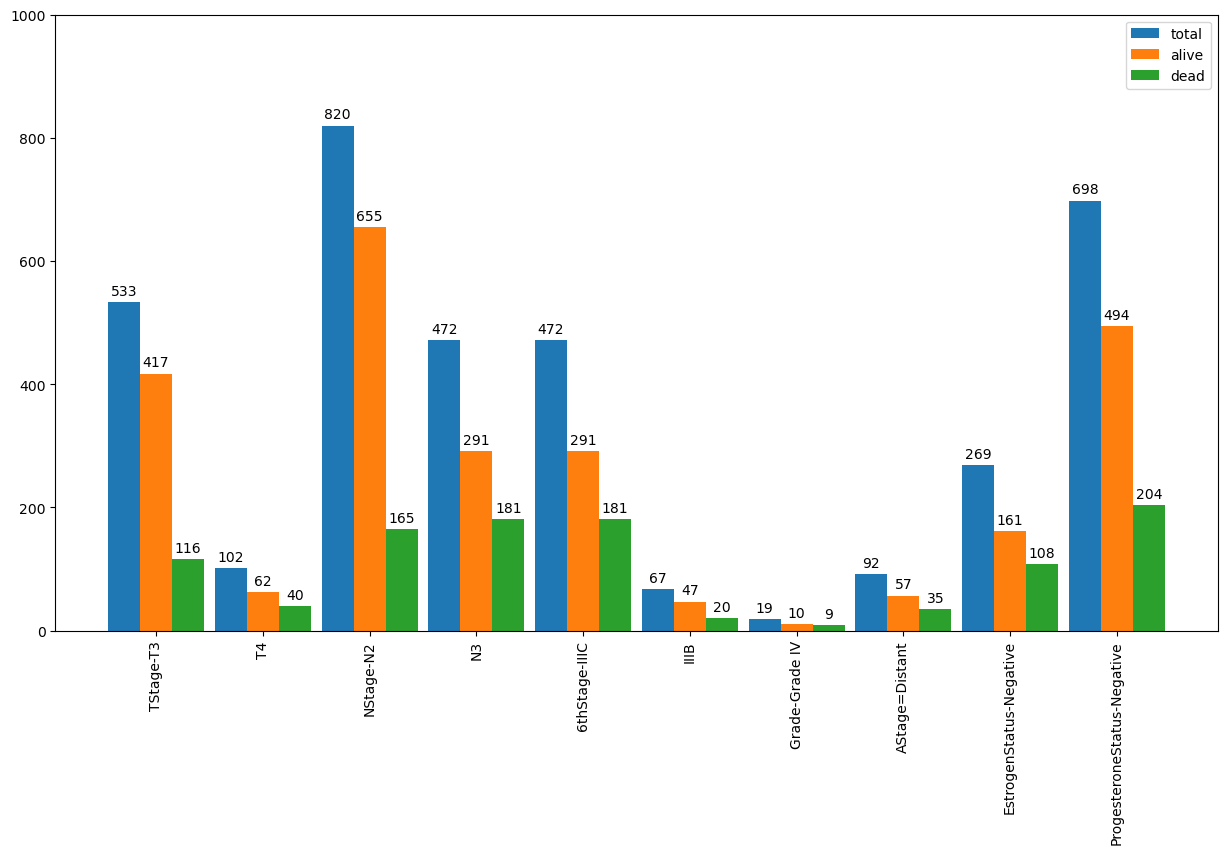

In [66]:
#category=["TStage-T3","TStage-T4","NStage-N2","NStage-N3","6thStage-IIIC","6thStage-IIIB","Grade-Grade IV","AStage=Distant","EstrogenStatus-Negative","ProgesteroneStatus-Negative"]
category=("TStage-T3","T4","NStage-N2","N3","6thStage-IIIC","IIIB","Grade-Grade IV","AStage=Distant","EstrogenStatus-Negative","ProgesteroneStatus-Negative")
values={'total':(533,102,820,472,472,67,19,92,269,698),
'alive':(417,62,655,291,291,47,10,57,161,494),
'dead':(116,40,165,181,181,20,9,35,108,204)}
x = np.arange(len(category))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 8))

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Length (mm)')
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, category,rotation='vertical')
ax.legend()
ax.set_ylim(0, 1000)

plt.show()

There is any 'No' correlation between these variables, however they effect the 'status'(alive/ dead) column. 

### Bivariate Analysis

<AxesSubplot:>

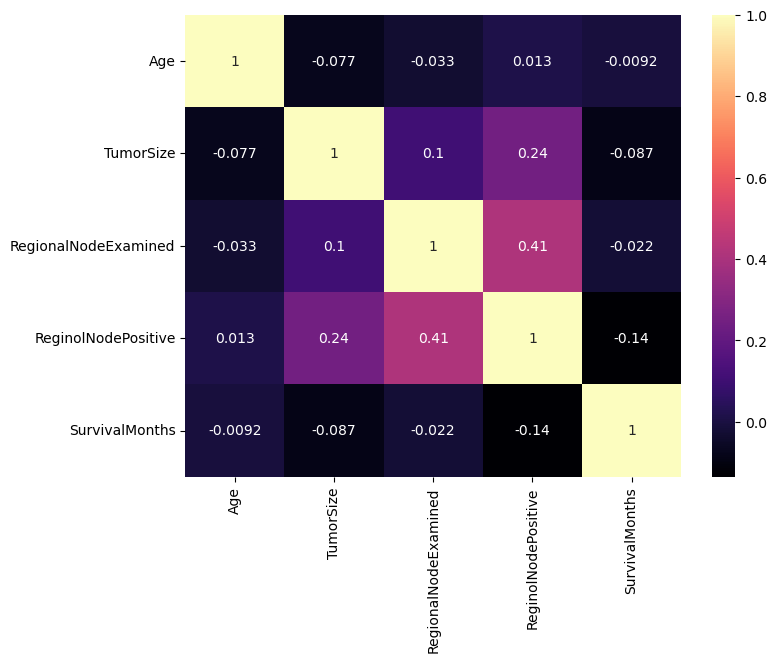

In [67]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_seerdata.corr(),annot=True,cmap='magma')

The heat map illustrates that correlation greater than 0 between `regional node positive` and `regional node examined` (0.41), and `tumor size` and `regional node positive` (0.24).

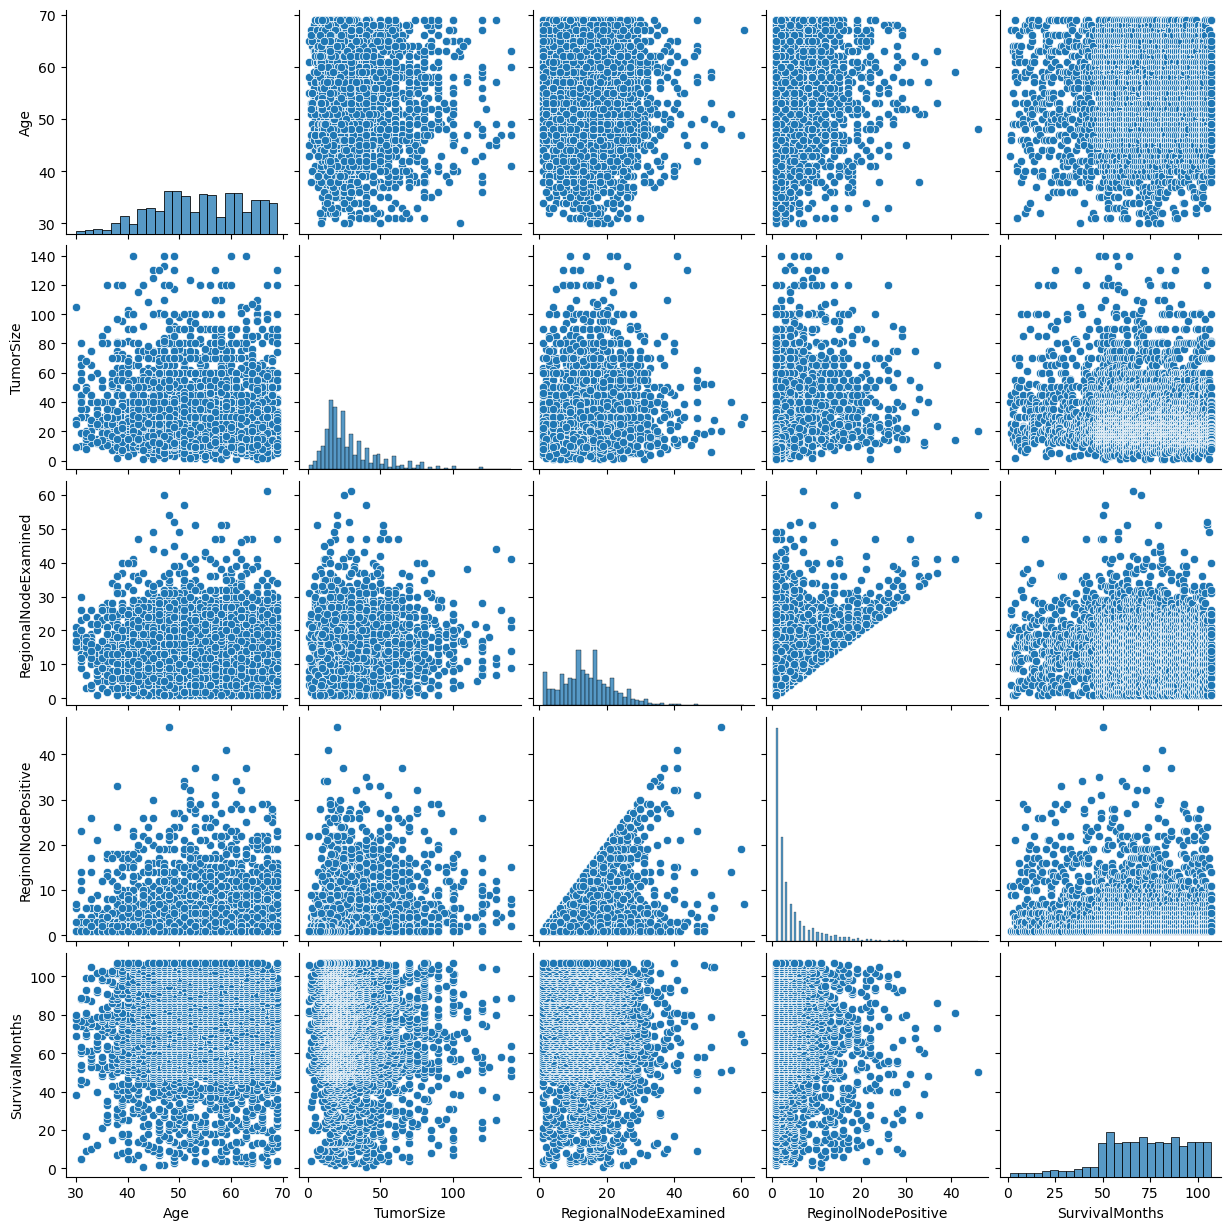

In [68]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df_seerdata[['Age','TumorSize','RegionalNodeExamined','ReginolNodePositive','SurvivalMonths']].dropna())
plt.show()

There is a linear relationship between `Reginol Node Positive` and `Regional Node Examined`.

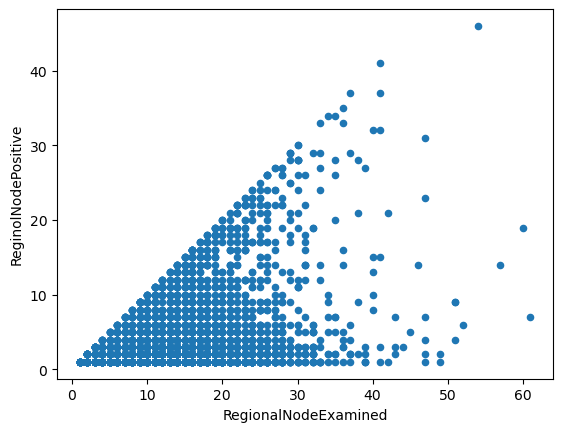

In [69]:
df_seerdata.plot.scatter(x='RegionalNodeExamined', y='ReginolNodePositive')
plt.show()

There is a linear relationship between `Regional Node Examined` and `Reginol Node Positive`. Regional Lymph Nodes Examined are the total number of regional lymph nodes that were removed and examined by the pathologist. `Reginol Node Positive` are the exact number of regional nodes examined by the pathologist. It looks like that these two features have a connection.

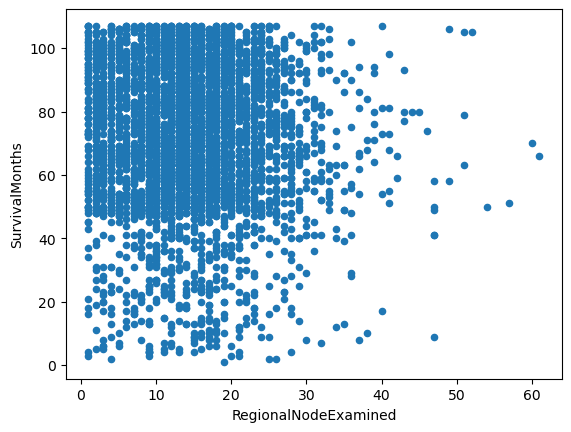

In [70]:
df_seerdata.plot.scatter(x='RegionalNodeExamined', y='SurvivalMonths')
plt.show()

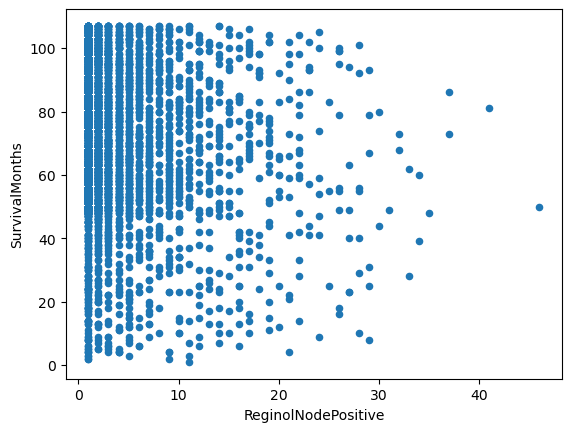

In [71]:
df_seerdata.plot.scatter(x='ReginolNodePositive', y='SurvivalMonths')
plt.show()

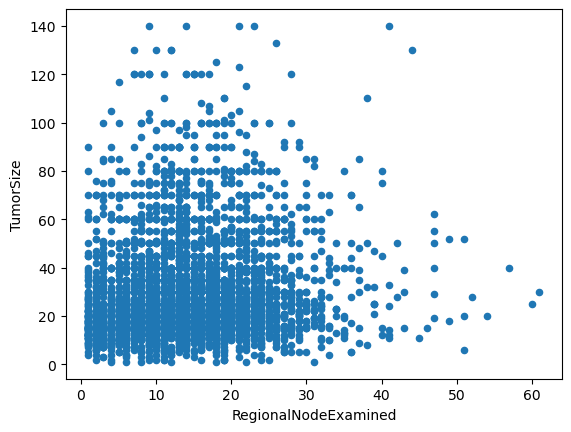

In [72]:
df_seerdata.plot.scatter(x='RegionalNodeExamined', y='TumorSize')
plt.show()

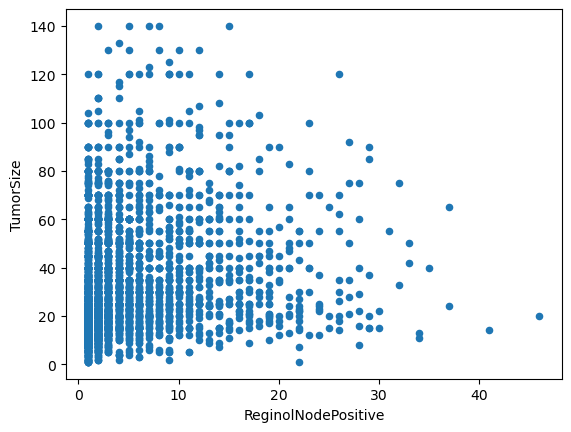

In [73]:
df_seerdata.plot.scatter(x='ReginolNodePositive', y='TumorSize')
plt.show()

# Multi variate Analysis

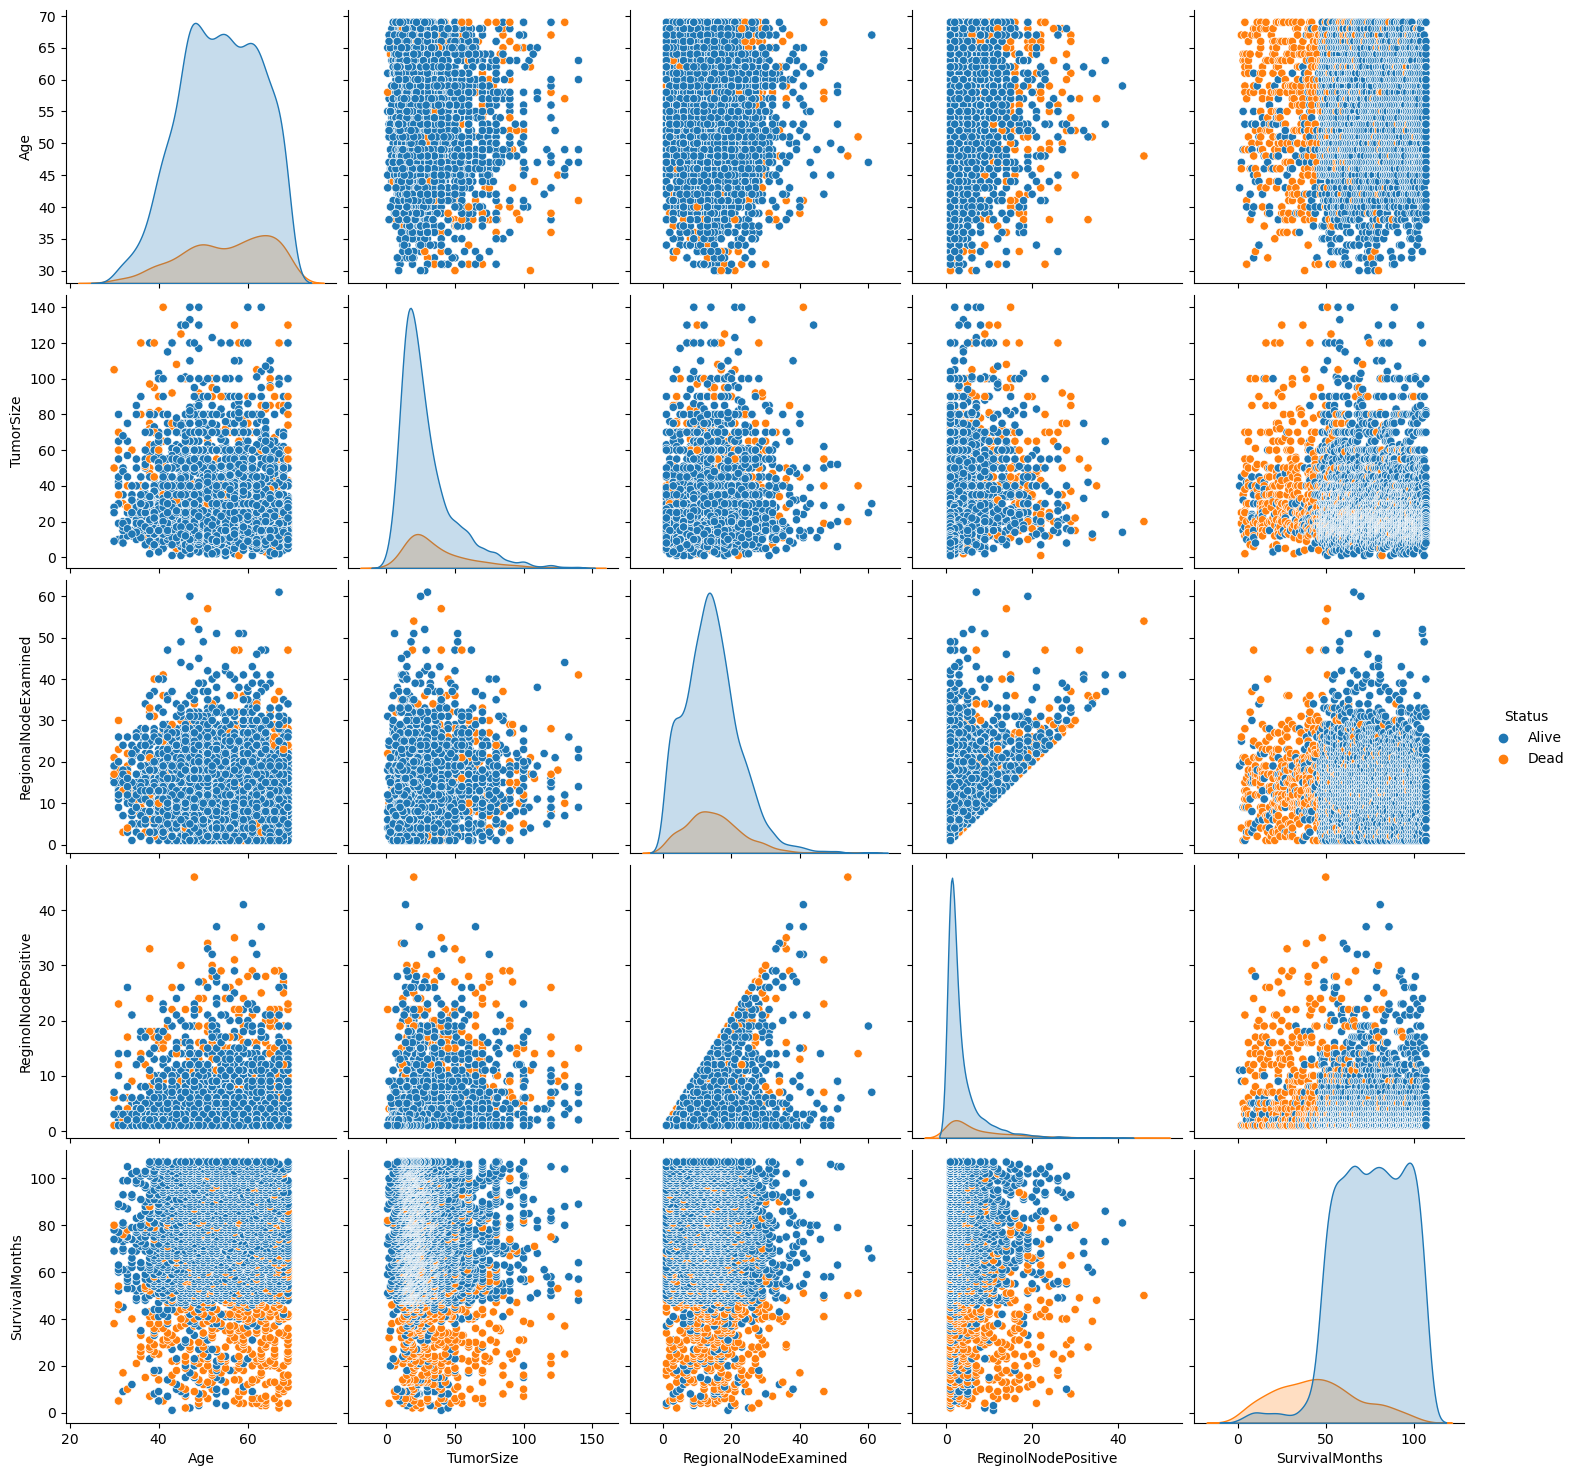

In [74]:
sns.pairplot(df_seerdata,hue="Status",size=3)

There is a linear relationship between Regional Node Examined and Reginol Node Positive.

In [75]:
df_seerdata.to_csv('SEER_Partly_Preprocessed_Data.csv')